#Import thu vien

In [ ]:
import numpy as np
from autograd import grad
import autograd.numpy as np1
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy.optimize import minimize

#Cac Ham

##Ham muc tieu

In [ ]:
def f(x):
    #return (x[0][0]+1)/(-x[0][0]**2 + 3*x[0][0] - x[1][0]**2 + 3*x[1][0] +3.5)
    #return (x[0][0]**2 - 2*x[0][0] + x[1][0]**2 - 8*x[1][0] + 20)/(x[1][0])
    #return f1(x)*f2(x)
    #return (x[0][0]**2 + x[1][0]**2 + 3)/(1 + 2*x[0][0] + 8*x[1][0])
    return (np1.exp(np1.abs(x[1]-3)) - 30) / (x[0]**2 + x[2]**2 + 2*(x[3]**2) + 4)
    #print(x[0],x[1])
    #return (np1.exp(np1.abs(x[0]-1)) + np1.abs(x[0]-x[1]) + x[1]**2 - 30) / ((x[0] + x[1])**2 + 1)

##Constraint

In [ ]:
def g1(x):
    #return x[0][0] + x[1][0]**2 + np1.exp(x[0][0] + x[1][0]) - 4
    #return 2*x[0][0] + x[1][0] - 6
    #return -x[0][0]**2 - 2*x[0][0]*x[1][0] +4
    return 10 - ((x[0] + x[2])**3 + 2*(x[3])**2)
    #return 4 - (x[0] + x[0]**2 + np1.exp(x[0]+x[1]))
def g2(x):
    #return x[0][0]**2 + x[1][0]**2- 1
    #return 3*x[0][0] + x[1][0] - 8
    #return -x[0][0]
    return 1 - ((x[1] - 1)**2)
    #return 1 - np1.linalg.norm(x,2)**2
def g3(x):
    #return x[0][0] - x[1][0] - 1
    x = np.array(x)
    A = np.array([[2,4,1,0]])
    b = np.array([[-1]])
    #print(x.T.shape)
    return (A@(x.T) - b.T).tolist()[0][0]

In [ ]:
g1_dx = grad(g1)
g2_dx = grad(g2)
g3_dx = grad(g3)
g_dx = [g1_dx,g2_dx,g3_dx]
f_dx = grad(f)

In [ ]:
cons = ({'type': 'eq',
          'fun' : lambda x: np.array([g3(x)])},
         {'type': 'ineq',
          'fun' : lambda x: np.array([g1(x)])},
          {'type': 'ineq',
          'fun' : lambda x: np.array([g2(x)])})

#Main

In [ ]:
def rosen(x,y):
    """Toan tu chieu P_c"""
    return np.sqrt(np.sum((x-y)**2))
def find_min(y,n):
    x = np.random.rand(1,n).tolist()[0]
    res = minimize(rosen, x, args=(y),
                constraints=cons,method='SLSQP', options={'disp': False})
    return res.x

##Thuat toan

In [ ]:
def run_nonsmooth1(x, max_iters, f, f_dx,n):
    res = []
    val = []
    lda = 0.1 #1e9
    sigma = 0.1 #100
    K = np.random.rand(1,1)
    res.append(x)
    val.append(f(x))
    x_pre = x
    for t in range(max_iters):
        y = x - lda*f_dx(x)
        x_pre = x.copy()
        x = find_min(y,n)
        if f(x) - f(x_pre) + sigma*(np.dot(f_dx(x_pre).T,x_pre - x)) <= 0:
            lda = lda
        else:
            lda = K*lda
        res.append(x)
        val.append(f(x))
    print(x)
    print(f(x))
    return res,val

## Plot

In [ ]:
def plot_x(sol_all,count,max_iters):
    t = [i for i in range(max_iters+1)]
    plt.figure(figsize=(8,8))
    plt.rcParams.update({'font.size': 16})
    for i in range(count):
        plt.plot(t, sol_all[i][:,0],color='r',label=r'$x_{1}(t)$',linewidth=1)
        plt.plot(t, sol_all[i][:,1],color='g',label=r'$x_{2}(t)$',linewidth=1)
        plt.plot(t, sol_all[i][:,2],color='b',label=r'$x_{3}(t)$',linewidth=1)
        plt.plot(t, sol_all[i][:,3],color='y',label=r'$x_{4}(t)$',linewidth=1)
    plt.xlabel('iteration')
    plt.ylabel('x(t)')
    plt.legend([r'$x_{1}(t)$',r'$x_{2}(t)$',r'$x_{3}(t)$',r'$x_{4}(t)$'])
    plt.show()
def plot_y(val_all,count,max_iters):
    t = [i for i in range(max_iters+1)]
    plt.figure(figsize=(8,8))
    plt.rcParams.update({'font.size': 16})
    for i in range(count):
        plt.plot(t, val_all[i][:],color='r',label=r'$f_(x)$',linewidth=1)
    plt.xlabel('iteration')
    plt.ylabel('f(x)')
    plt.legend([r'$f(x)$'])

    plt.show()

##Ham Main

[-1.06935619e+00  4.18252983e-01 -5.34299554e-01 -8.95714631e-05]
-3.0907699610338004
[-1.06911127e+00  4.18212514e-01 -5.34627525e-01  2.39941779e-05]
-3.090770015891834
[-1.07029192e+00  4.18781853e-01 -5.34543576e-01 -2.34486169e-04]
-3.090769108851594
[-1.06940876e+00  4.18192526e-01 -5.33952587e-01  8.27911895e-05]
-3.0907697418323394
[-1.07044160e+00  4.18704452e-01 -5.33934619e-01 -7.19671591e-05]
-3.090768785966458
[-1.06923529e+00  4.18200538e-01 -5.34331573e-01 -1.91475992e-04]
-3.0907699330799945
[-1.06958831e+00  4.18497569e-01 -5.34813648e-01 -2.14824507e-04]
-3.090769870742634
[-1.07539008e+00  4.19120839e-01 -5.25703202e-01 -7.57101661e-05]
-3.090702540318147
[-1.07053203e+00  4.18490857e-01 -5.32899369e-01 -1.99312967e-04]
-3.0907673340236355
[-1.06962523e+00  4.18561920e-01 -5.34997211e-01 -8.25186951e-05]
-3.0907698103267363


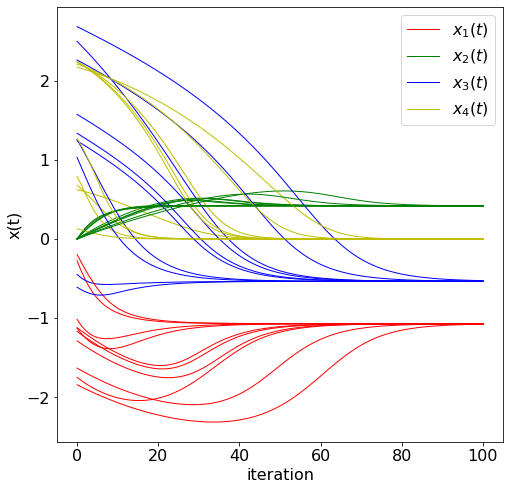

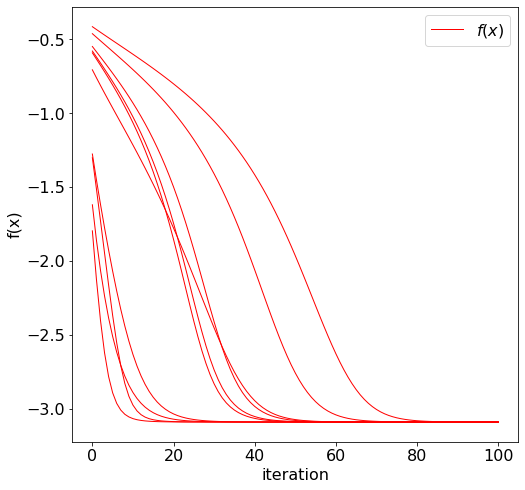

In [ ]:
if __name__ == '__main__':
    num = 10 # number of init points
    max_iters = 100 # number of interations
    sol_all = []
    val_all = []
    count = 0
    epsilon = 0.1
    n = 4 # dimension x
    for i in range(num):
        x0 = 5*np.random.rand(1,n)
        x0 = find_min(x0,n) # init point
        g1x = g1(x0)
        g2x = g2(x0)
        g3x = g3(x0)
        # g4x = g4(x0)
        # g5x = g5(x0)
        gx = [g1x,g2x,g3x]
        count += 1
        res,val = run_nonsmooth1(x0, max_iters, f, f_dx,n)
        tmp = np.array(res)[:,:]
        sol_all.append(tmp)
        val_all.append(val)
    # Plot trajectory
    plot_x(sol_all,count,max_iters)
    plot_y(val_all,count,max_iters)
